In [2]:
pip install jpype1

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 583.3/583.3 kB 4.5 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install konlpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 17.2 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [5]:
president_speech = open('week11_speech_moon.txt', encoding = 'UTF-8').read()
# president_speech = open('week11_speech_yoon.txt', encoding = 'UTF-8').read()
# president_speech

In [7]:
# 불필요한 문자 제거
import re
president_speech = re.sub('[^가-힣]', ' ', president_speech)  # 두번째 파라미터가 공백 문자임에 주의
# president_speech

In [39]:
# hannanum 만들기
import konlpy
hannanum = konlpy.tag.Hannanum()

In [41]:
# 형태소와 종류까지 추출하기 (N 명사, J 조사 등)
# hannanum.pos("대한민국의 영토는 한반도와 그 부속도서로 한다")
# 형태소 종류 알파벳의 의미 확인
# hannanum.tagset
# hannanum.pos(president_speech)
nouns = hannanum.nouns(president_speech)
# nouns[:20]
# list 형태 -> pandas DataFrame (갯수 카운트 하려고)
# -> dictionaly(wordcloud)

In [42]:
import pandas as pd
df_word = pd.DataFrame({"word" : nouns})
df_word.head()
# word에 똑같은 단어가 몇개씩 있는가? 확인?
df_word.groupby('word').agg(갯수 = ('word', 'count'))\
    .sort_values('갯수', ascending=False)

갯수
word    
저     22
일자리   19
나라    19
국민    18
우리    17
...   ..
북핵문제   1
분      1
분단     1
분야     1
손      1

[789 rows x 1 columns]

In [47]:
# 단어의 글자수가 1인것을 제외
df_word['글자수'] = df_word['word'].str.len()
df_word.head()
# 단어의 글자수가 1인것을 제외
df_word = df_word.query('글자수 > 1')
df_word

word  글자수
0     정권교체    4
1     정치교체    4
2     시대교체    4
3     불비불명    4
4       고사    2
...    ...  ...
1408    모두    2
1409    주인    2
1410   진정한    3
1411  우리나라    4
1412   대통령    3

[1187 rows x 2 columns]

<Axes: xlabel='word', ylabel='갯수'>

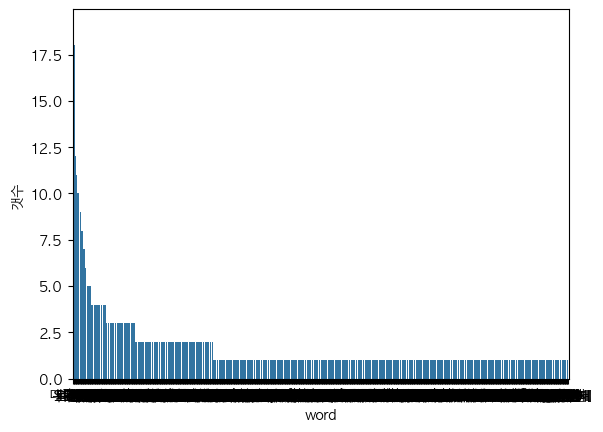

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams.update({'font.family' : 'AppleGothic'})

result = df_word.groupby('word', as_index= False).agg(갯수 = ('word', 'count')).sort_values('갯수', ascending=False)
sns.barplot(data = result, x = 'word', y='갯수')

In [55]:
!pip install wordcloud

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.9/168.9 kB 1.1 MB/s eta 0:00:00ta 0:00:01


In [106]:
font = '../Data/DoHyeon-Regular.ttf'
# df_word - 데이터 프레임 -> dictionary
#DataFrame을 dictionary로 변경
dic_word = result.set_index('word').to_dict()['갯수']
# dic_word

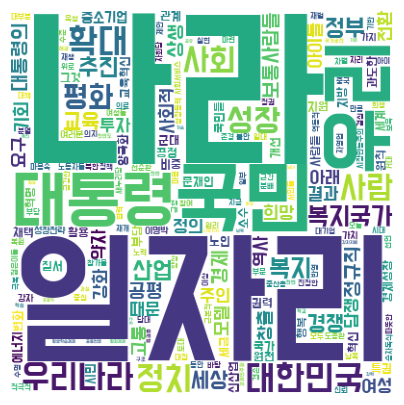

In [67]:
from wordcloud import WordCloud
# wc 만들기
wc = WordCloud(random_state = 700,         # 난수 고정, 항상 같은 모양으로 생성
                font_path = font,           # 폰트 설정
                width = 400,                # 가로 크기
                height = 400,               # 세로 크기
                background_color = 'white') # 배경색

# 워드 클라우드 만들기
img_wordcloud = wc.generate_from_frequencies(dic_word)

# 워드 클라우드 출력하기
# 자주 사용한 단어는 크게 표시됨
plt.figure(figsize = (5, 5))            # 액자 사이즈
plt.axis('off')                         # 테두리 선 없애기
plt.imshow(img_wordcloud)

In [69]:
import PIL
icon = PIL.Image.open('week11_alice.png')
icon.show()

In [74]:
# mask 파일 생성
import numpy as np
img = np.array(icon)
# img

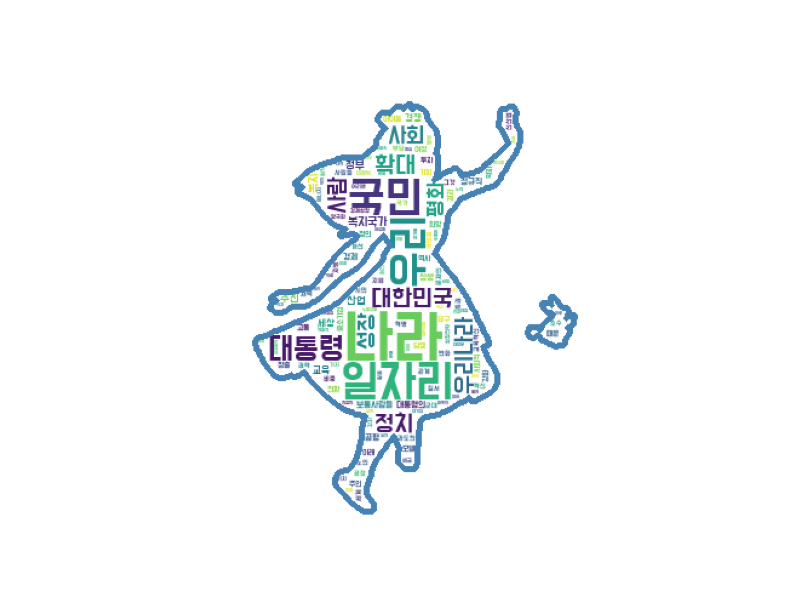

In [76]:
# wc  만들기
wc = WordCloud(random_state=1234,
              font_path = font,
              width = 400,
              height = 400,
              contour_width=5,                  # 테두리 굵기
              contour_color='steelblue',        # 테두리 색
              background_color = 'white',
              mask = img)                      # 배경으로 사용할 이미지

type(wc) 

# 구름 이미지로 mask 만들기# 워드 클라우드 만들기
img_wordcloud = wc.generate_from_frequencies(dic_word)

# 워드 클라우드 출력하기
plt.figure(figsize = (10, 10))
plt.axis('off')
plt.imshow(img_wordcloud)

In [92]:
# 주제 선정
# 연예인, 사회이슈, 대선, 트럼프, 비트코인 -> 뉴스 긁어옴
# 주제와 관계있는 그림 -> 워드 클라우드 생성
woodz = open('week11_woodz.txt', encoding = 'UTF-8').read()
woodz = re.sub('[^가-힣]', ' ', woodz)
# woodz
hannanum = konlpy.tag.Hannanum()
nouns = hannanum.nouns(woodz)

In [96]:
df_woodz = pd.DataFrame({"word" : nouns})
df_woodz.head()
# word에 똑같은 단어가 몇개씩 있는가? 확인?
df_woodz.groupby('word').agg(갯수 = ('word', 'count'))\
    .sort_values('갯수', ascending=False)

갯수
word    
우즈    21
곡     13
역주행   12
그     10
은      9
...   ..
본업     1
본명     1
보컬     1
병역     1
스쿨     1

[369 rows x 1 columns]

In [100]:
# 단어의 글자수가 1인것을 제외
df_woodz['글자수'] = df_woodz['word'].str.len()
df_woodz.head()
# 단어의 글자수가 1인것을 제외
df_woodz = df_woodz.query('글자수 > 1')
df_woodz

word  글자수
0     서울    2
1    뉴시스    3
2    이재훈    3
4     가수    2
5     우즈    2
..   ...  ...
662   기간    2
667   기분    2
668   모범    2
669   사례    2
671   탄생    2

[519 rows x 2 columns]

<Axes: xlabel='word', ylabel='갯수'>

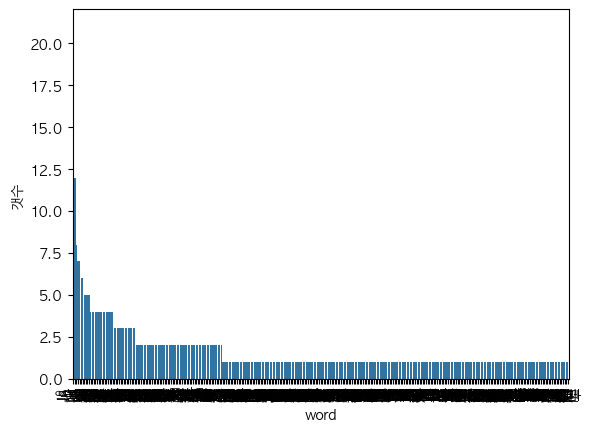

In [102]:
woodz_result = df_woodz.groupby('word', as_index= False).agg(갯수 = ('word', 'count')).sort_values('갯수', ascending=False)
sns.barplot(data = woodz_result, x = 'word', y='갯수')

In [110]:
font = '../Data/DoHyeon-Regular.ttf'
# df_word - 데이터 프레임 -> dictionary
#DataFrame을 dictionary로 변경
dic_word_woodz = woodz_result.set_index('word').to_dict()['갯수']

In [120]:
# 이미지 파일 읽기 및 NumPy 배열로 변환
icon_woodz = PIL.Image.open('week11_cat.png')  # 이미지 파일 경로
icon_woodz = icon_woodz.convert("L")  # 이미지를 흑백으로 변환
img_wordcloud = np.array(icon_woodz)  # NumPy 배열로 변환

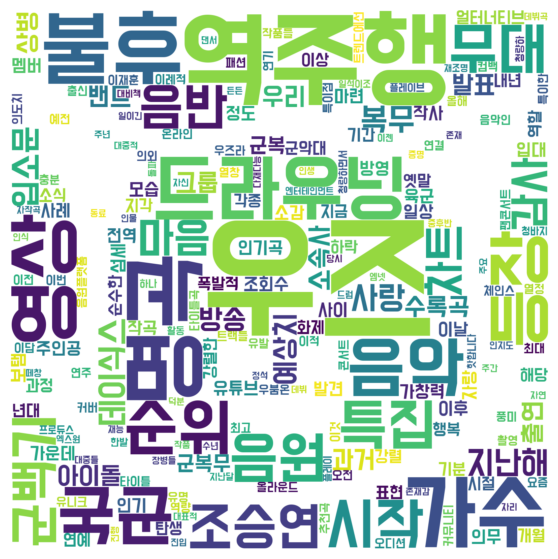

In [124]:
# 워드 클라우드 만들기
wc_woodz = WordCloud(
    random_state=700,         # 난수 고정
    font_path=font,           # 폰트 설정
    width=400,                # 가로 크기
    height=400,               # 세로 크기
    background_color="white", # 배경색
    mask=img_wordcloud        # 올바른 NumPy 배열 전달
)

# 워드 클라우드 생성
woodz_wordcloud = wc_woodz.generate_from_frequencies(dic_word_woodz)

# 워드 클라우드 출력
plt.figure(figsize=(7, 7))  # 그래프 크기 설정
plt.axis('off')             # 축 제거
plt.imshow(woodz_wordcloud, interpolation="bilinear")
plt.show()